In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
from tqdm.notebook import tqdm, trange

In [16]:
from desitarget import cuts as desi_cuts
from desitarget.cuts import _psflike

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
!pip install corner --user
import corner as DFM

In [5]:
ls_S_dir = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/south/sweep/9.0'
ls_N_dir = '/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/north/sweep/9.0'
#ls_S_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper'
#ls_N_dir = '/Users/chahah/data/bgs_cmxsv/sv_paper'

cat_S = atable.Table.read(os.path.join(ls_S_dir, 'sweep-200p005-210p010.fits'))
cat_N = atable.Table.read(os.path.join(ls_N_dir, 'sweep-190p040-200p045.fits'))

In [6]:
cat_S['PHOTSYS'] = 'S'
cat_N['PHOTSYS'] = 'N'

In [13]:
cat_S

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,FITBITS,SERSIC,SERSIC_IVAR,PHOTSYS
,,,,,deg,deg,1/deg^2,1/deg^2,,mag,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,arcsec,1/arcsec^2,,,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,,,,mag,,mag,,mag,,,,,,,mas,1/mas^2,mas / yr,1/(mas/yr)^2,mas / yr,1/(mas/yr)^2,,,,,
int16,int32,bytes8,int32,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,str1
9010,368551,1999p065,3116,REX,200.0000022211809,6.519695407649016,1242933900.0,1262184100.0,75.74809 .. 0.0,0.03615618,0.19655214,0.25283065,0.24834844,-0.68859595,-0.3425195,-44.701916,1614.4225,1239.4463,465.92502,59.56128,3.0387156,0.67216307,0.0009589998,1.2998421e-05,0.898499,0.9304408,0.9604747,0.99389136,0.9962441,0.9991978,0.999697,4,4,3,185,185,15,16,1.1089072,1.0979587,1.0655653,0.68670493,0.8410653,0.55553037,0.12648492,0.046515077,0.035119142,0.31013286,19.684517,31.288376,0.8945297,0.646476,0.024570914,0.012829232,0.018122401,0.9679136,0.99406654,0.99213284,0,0,0,0,0,0,0,0,1.4977087,1.146462,1.3009874,1928.8977,840.58606,96.91335,1197.8712,444.08292,55.949993,4.270832,0.76777375,2005p060,0.4136471,103.70813,0.0,0.0,0.0,0.0,0.11215872,0.14427297,0.14171529,0.11215872,0.14427297,0.14171529,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,S
9010,368551,1999p065,3117,REX,200.00000446641772,6.616216699228652,40732566000.0,39620700000.0,1902.3727 .. 0.0,0.03786751,0.75958,1.1487745,2.4647768,2.955234,-0.91400665,-28.640461,-1431.7441,1374.2627,544.6977,72.00729,3.1015613,0.7001361,0.0010128842,1.35189e-05,0

In [7]:
optw_S = desi_cuts._prepare_optical_wise(objects=cat_S, mask=True)
optw_N = desi_cuts._prepare_optical_wise(objects=cat_N, mask=True)

gaia_S = desi_cuts._prepare_gaia(objects=cat_S, colnames=None)
gaia_N = desi_cuts._prepare_gaia(objects=cat_N, colnames=None)

In [8]:
rfib_S = 22.5 - 2.5 * np.log10(optw_S[9].clip(1e-16))
gmag_S = 22.5 - 2.5 * np.log10(optw_S[3].clip(1e-16))
rmag_S = 22.5 - 2.5 * np.log10(optw_S[4].clip(1e-16))
zmag_S = 22.5 - 2.5 * np.log10(optw_S[5].clip(1e-16))
w1_S = 22.5 - 2.5 * np.log10(optw_S[6].clip(1e-16))

gaia_g_S = gaia_S[6]
G_rr_S = gaia_S[11]

rfib_N = 22.5 - 2.5 * np.log10(optw_N[9].clip(1e-16))
gmag_N = 22.5 - 2.5 * np.log10(optw_N[3].clip(1e-16))
rmag_N = 22.5 - 2.5 * np.log10(optw_N[4].clip(1e-16))
zmag_N = 22.5 - 2.5 * np.log10(optw_N[5].clip(1e-16))
w1_N = 22.5 - 2.5 * np.log10(optw_N[6].clip(1e-16))

gaia_g_N = gaia_N[6]
G_rr_N = gaia_N[11]

In [15]:
objtype_S = optw_S[14]
objtype_N = optw_N[14]

In [19]:
is_gal_S = G_rr_S > 0.6
is_gal_S |= gaia_g_S == 0 
is_gal_S |= (G_rr_S < 0.6) & (~_psflike(objtype_S)) & (gaia_g_S != 0)

In [9]:
sv1_bright = (rmag_S < 19.5) 
sv1_faint = (rmag_S > 19.5) & (rmag_S < 20.1)
sv1_faint_ext = (rmag_S > 20.1) & (rmag_S < 20.5) & (rfib_S > 21.051)
sv1_faint_fibmag = (rmag_S > 20.1) & (rfib_S < 21.051)
sv1_all = sv1_bright | sv1_faint | sv1_faint_ext | sv1_faint_fibmag

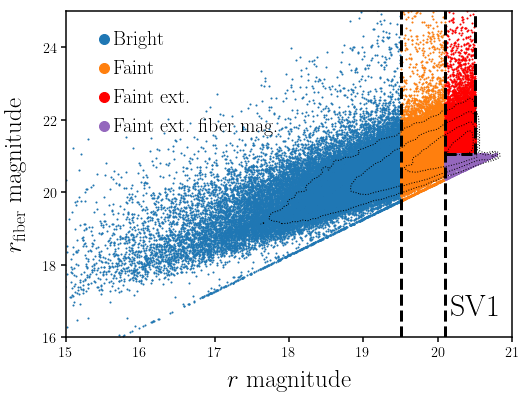

In [20]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)

DFM.hist2d(rmag_S[is_gal_S & sv1_all], rfib_S[is_gal_S & sv1_all], 
           range=[(14, 21), (16, 26)], color='k', 
           plot_density=False, plot_datapoints=True, no_fill_contours=True, 
           bins=200, smooth=True, 
           contour_kwargs={'linewidths': 1, 'linestyles': ':'}, 
           ax=sub)

sub.scatter(rmag_S[is_gal_S & sv1_bright], rfib_S[is_gal_S & sv1_bright], s=1, c='C0', label='Bright')
sub.scatter(rmag_S[is_gal_S & sv1_faint], rfib_S[is_gal_S & sv1_faint], s=1, c='C1', label='Faint')
sub.scatter(rmag_S[is_gal_S & sv1_faint_ext], rfib_S[is_gal_S & sv1_faint_ext], s=1, c='r', label='Faint ext.')
sub.scatter(rmag_S[is_gal_S & sv1_faint_fibmag], rfib_S[is_gal_S & sv1_faint_fibmag], s=1, c='C4', label='Faint ext. fiber mag.')

sub.legend(loc='upper left', fontsize=20, handletextpad=-0.5, markerscale=10)
# hb = sub.hexbin(rmag_S[sv1_all], rfib_S[sv1_all], 
#                 C=np.ones(np.sum(sv1_all))/47, 
#                 reduce_C_function=np.sum, extent=(14, 21, 16, 26), gridsize=30, 
#                 edgecolors='k', linewidth=1., mincnt=2, cmap='Spectral_r')
# sub.text(0.05, 0.95, r'SV1', ha='left', va='top', transform=sub.transAxes, fontsize=30)

# sub.plot([14, 17.8], [19.1, 22.9], c='k', ls='--', lw=3)
# sub.plot([17.8, 19.5], [22.9, 22.9], c='k', ls='--', lw=3)

sub.plot([19.5, 19.5], [16., 26], c='k', ls='--', lw=3)
sub.plot([20.1, 20.1], [16., 26], c='k', ls='--', lw=3)
sub.plot([20.1, 20.5], [21.051, 21.051], c='k', ls='--', lw=3)
sub.plot([20.5, 20.5], [21.051, 26.0], c='k', ls='--', lw=3)

sub.text(0.975, 0.05, r'SV1', ha='right', va='bottom', transform=sub.transAxes, fontsize=30)

sub.set_xlim(15, 21)
sub.set_ylim(16, 25)
sub.set_yticks([16, 18, 20, 22, 24])
#sub.set_yticklabels([])

bkgd = fig.add_subplot(111, frameon=False)
bkgd.set_xlabel(r'$r$ magnitude', labelpad=10, fontsize=25) 
bkgd.set_ylabel(r'$r_{\rm fiber}$ magnitude', labelpad=10, fontsize=25) 
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# fig.subplots_adjust(wspace=0.1, right=0.8)


fig.savefig('figs/sv1_targets.pdf', bbox_inches='tight')